<a href="https://colab.research.google.com/github/Sanika07/Algorithms/blob/master/Decision_Tree_%5BGRIP%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prediction using Decision Tree Algorithm**

GRIP MAY2021 INTERN

**Author: Sanika Awasthi**

In [27]:
# importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# importing iris dataset
data=pd.read_csv('/content/Iris.csv')
data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**Understanding the dataset**

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [34]:
data.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [36]:
data['Species_class']=np.where(data.Species=='Iris-virginica',1,np.where(data.Species=='Iris-versicolor',2,3))

In [37]:
data.Species_class.value_counts()

3    50
2    50
1    50
Name: Species_class, dtype: int64

In [38]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Species_class'],
      dtype='object')

In [ ]:
cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

**Graphical Visualization [Boxplot]**

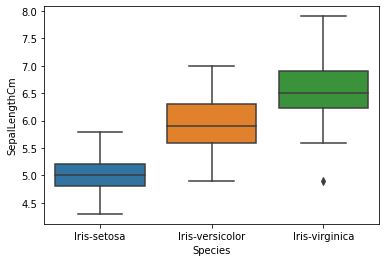

In [43]:
sns.boxplot(data=data, x='Species',y='SepalLengthCm')

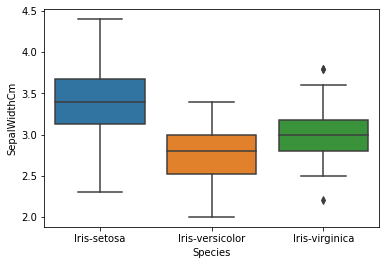

In [44]:
sns.boxplot(data=data, x='Species',y='SepalWidthCm')

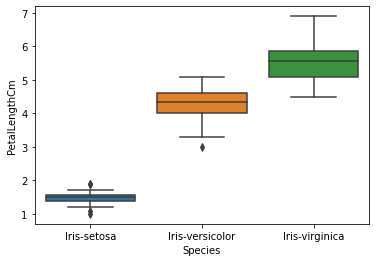

In [45]:
sns.boxplot(data=data, x='Species',y='PetalLengthCm')

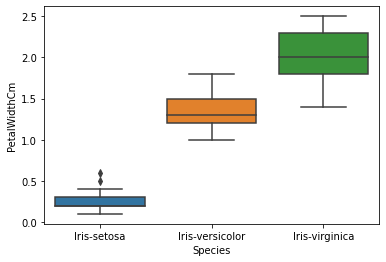

In [46]:
sns.boxplot(data=data, x='Species',y='PetalWidthCm')

**[PairPlot]**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


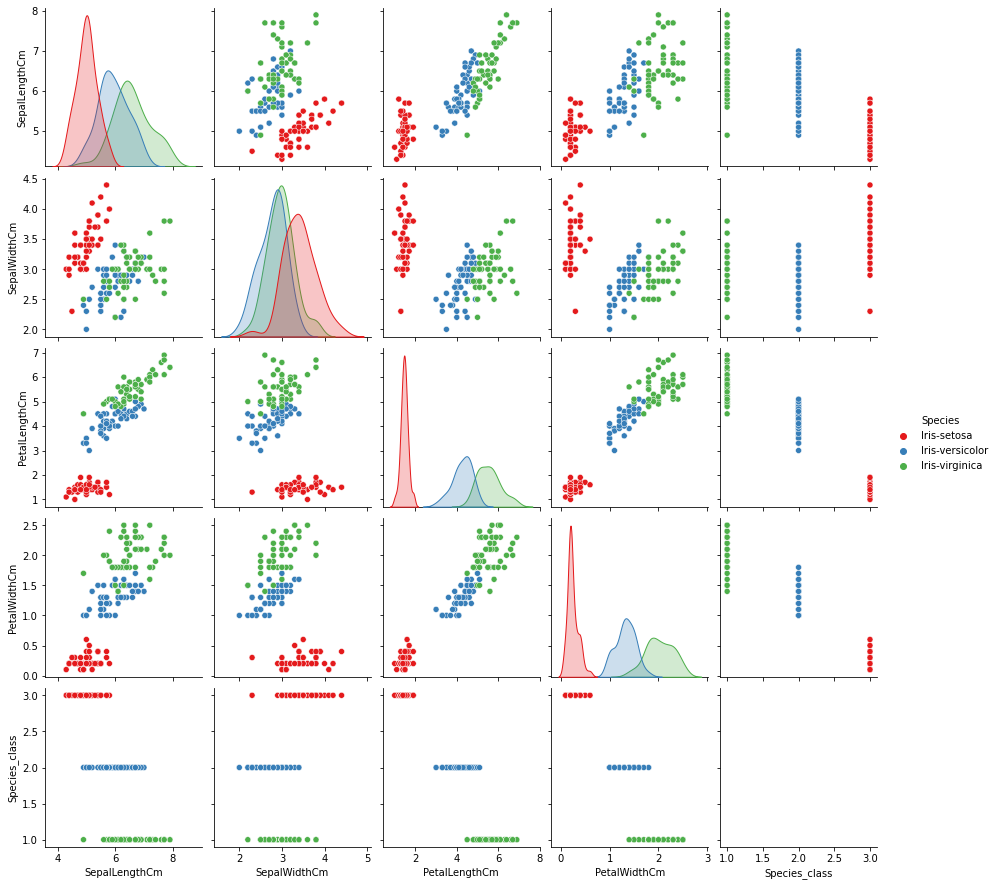

In [47]:
sns.pairplot(data.drop('Id',axis=1),hue='Species',palette='Set1')

**[HeadMap]**

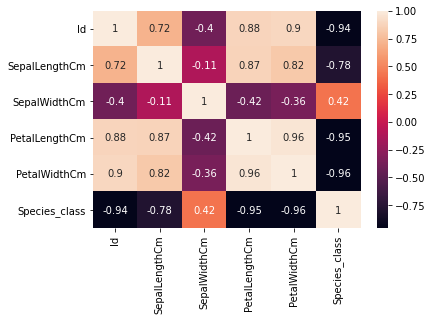

In [48]:
sns.heatmap(data.corr(),annot=True)

**Dependent Variable Encoding**

In [50]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data['Species']=l.fit_transform(data['Species'])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_class
0,1,5.1,3.5,1.4,0.2,0,3
1,2,4.9,3.0,1.4,0.2,0,3
2,3,4.7,3.2,1.3,0.2,0,3
3,4,4.6,3.1,1.5,0.2,0,3
4,5,5.0,3.6,1.4,0.2,0,3
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2,1
146,147,6.3,2.5,5.0,1.9,2,1
147,148,6.5,3.0,5.2,2.0,2,1
148,149,6.2,3.4,5.4,2.3,2,1


**Data Splitting using Train & Test Split**

In [53]:
x=data.drop(['Id','Species'],axis=1)
y=data['Species']

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Training Data**

In [89]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Visualizing Decision Tree**

[Text(334.8, 679.5, 'X[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(167.4, 407.69999999999993, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(502.20000000000005, 407.69999999999993, 'X[4] <= 1.5\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(334.8, 135.89999999999998, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(669.6, 135.89999999999998, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]')]

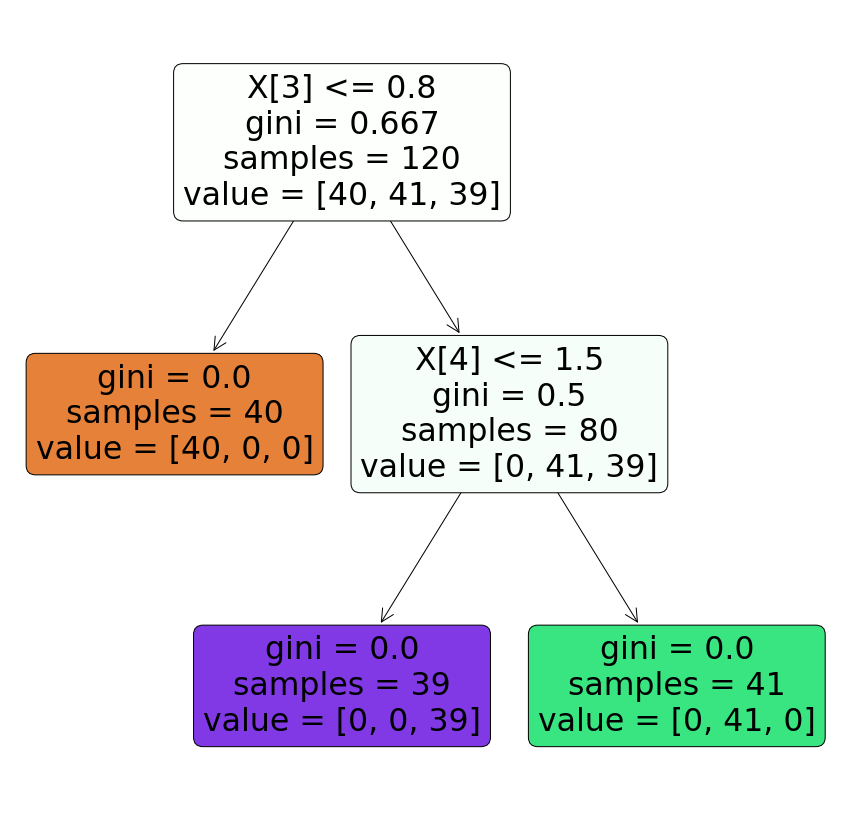

In [90]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(clf, filled=True, rounded=True)

**Accuracy Score & Confusion Matrix**

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred=clf.predict(x_test)
print('Accuracy Score = {}'.format(accuracy_score(y_test,y_pred)))
cm=confusion_matrix(y_test,y_pred)
print(format(cm))

Accuracy Score = 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**Completion of GRIP TASK**